Import libraries and data, prep data

In [113]:
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import PyPDF2 as pyp
import pandas as pd
import numpy as np
import random 
import os 
import matplotlib.image as mpimg 
import PIL
import plotly 
import plotly.express as px
import plotly.graph_objs as pg
#To generate graphs offline and view in notebook
import plotly.offline as po
po.init_notebook_mode(connected = True)
import base64, io, IPython
from PIL import Image as PILImage
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dash
from dash import dcc
from dash import html

#NetworkX and WordCloud: You will have difficulty installing both if you are not using
#the C++ distribution of Visual Studio. Go to the VS site and download latest version, but
#be sure you get the C++ version, not the .Net version.
import networkx as nx
from wordcloud import WordCloud

In [114]:
data = sns.load_dataset('penguins')
data.head()   

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [115]:
data['bill_length_mm'].fillna(data['bill_length_mm'].mean(), inplace=True)
data['bill_depth_mm'].fillna(data['bill_depth_mm'].mean(), inplace=True)
data['flipper_length_mm'].fillna(data['flipper_length_mm'].mean(), inplace=True)
data['body_mass_g'].fillna(data['body_mass_g'].mean(), inplace=True)
data['sex'].fillna(data['sex'].value_counts().index[0], inplace=True)
data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [116]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


Plot standard Seaborn plots

In [117]:
#Options are below for plots using Seaborn. Examples in following blocks.
'''
(data, kind, x, y, style, col, size, ci, row, hue, palette, order, orient, height, aspect, markers, linestyles, split, inner, col_wrap)
viz = sns.relplot(                      #What category of plot (catplot, relplot, displot)
    data=data,                          #What is your dataset?
    data=data.query(use " " and/or),    #Want to slice out any part of it for this viz?     
    kind = "line",                      #Plot type [relplot (line, scatter), catplot (strip, box, violin, boxen, point, bar, count, swarm)
                                        displot (hist, kde, ecdf), lmplot, regplot, residplot, heatmap, clustermap]
    x = "flipper_length_mm",            #What is your X
    y = "bill_length_mm",               #What is your Y   
    style = ,                           #Similar to hue, set marker style based on category
    col = "species",                    #Want to break out into small multiples vertically?    
    size = ,                            #Automatically normalized into ranges, size of marker or line by value
    ci = "sd",                          #Confidence interval for line plots ["none", "sd"]    
    row = ,                             #Use row with or instead of col    
    hue = "sex",                        #Want to color by a 3rd feature? Lineplot shows multiple lines. Or,    
    palette = {" " : " ", " " : " "}    #Want to specify colors for each category?
    order = [" ", " "],                 #Order your categories explicitly, or data = data.sort_values("feature")
    orient = "h",                       #Want to swap x and y?     
    height = , aspect = ,               #Want to set the height and width?    
    markers = ["^", "o"],               #Want some cool markers?
    linestyles = ["--"]                 #Want some cool linestyles? Line plot shows multiple lines.
    split = True,                       #Use to split violin plot into two hues
    inner = "stick"                     #Use to add value markers inside violin plot
    col_wrap = 5                        #Wraps values in small multiples of 5 columns, across many values    
    )

viz.set_axis_labels("Flipper length", "Bill length")
viz.set(xscale = "log")                 #Use to convert x to log scale
viz.figure.autofmt_xdate()              #Use when plotting time series, to format date
viz2 = sns.type(args, ax = viz.ax)      #Use to add a second type of plot to the same axis
''';

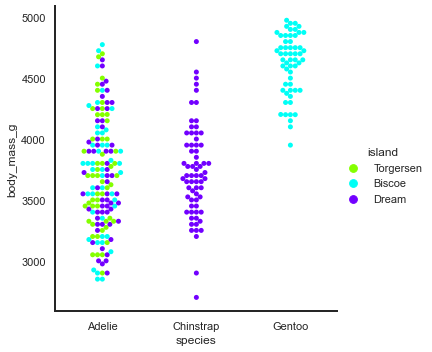

In [118]:
viz = sns.catplot(
    kind = "swarm",
    #kind = "strip",
    #kind = "box",
    #kind = "boxen"
    #kind = "point"
    #kind = "bar", orient = "h",
    #kind = "violin", split = True, inner = "stick",
    x = "species", 
    y = "body_mass_g",
    hue = "island",
    palette = "hsv",
    data = data.query("body_mass_g > 3500" and "body_mass_g < 5000")
)

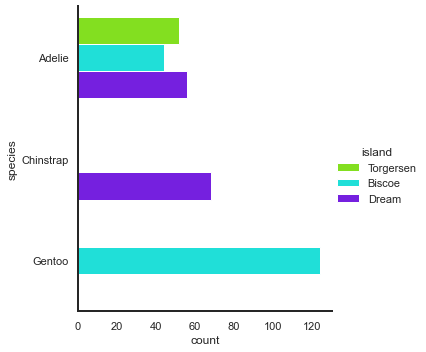

In [119]:
viz = sns.catplot(   
    data=data,       
    kind = "count",  
    y = "species",
    hue = "island",
    orient = "h",
    palette = "hsv"
)

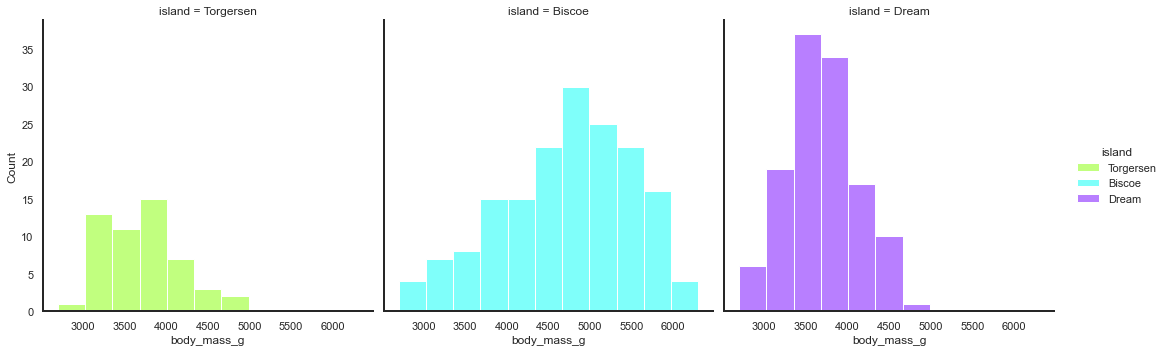

In [120]:
viz = sns.displot(
    data = data,  
    kind = "hist",
    #kind = "kde",
    #kind = "ecdf"
    col = "island",
    x = "body_mass_g",
    hue = "island",
    palette = "hsv"
)

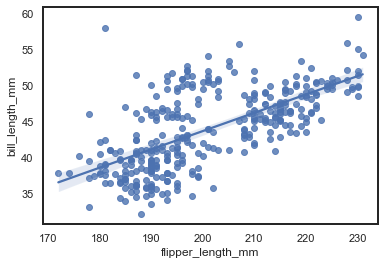

In [121]:
viz = sns.regplot(
    data = data,
    x = "flipper_length_mm",
    y = "bill_length_mm",
    ci = 99,
)

Plot figures with multiple graphs

[Text(0.5, 0, 'body mass'), Text(0, 0.5, 'island')]

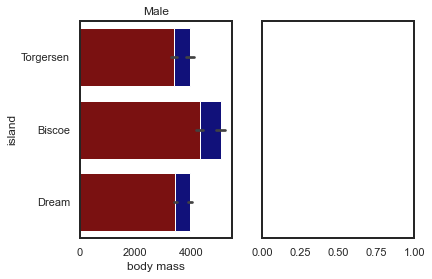

In [122]:
#PYRAMID BAR - 
fig, ax = plt.subplots(nrows=1, ncols=2, sharey = True)
sns.barplot(x = "body_mass_g", y = "island", color = "darkblue", ax = ax[0], data = data[(data.sex == "Male")])
sns.barplot(x = "body_mass_g", y = "island", color = "darkred", ax = ax[0], data = data[(data.sex == "Female")])
#ax[0].invert_xaxis()
#ax[1].yaxis.tick_right()
ax[0].set_title("Male")
#ax[1].set_title("Female")
ax[0].set(xlabel="body mass", ylabel="island") 
#ax[1].set(xlabel="body mass", ylabel="")
#fig.suptitle("Penguins")

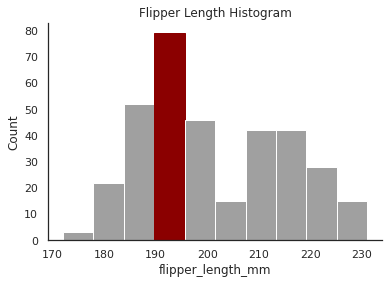

In [123]:
#HISTOGRAM comparison- 
sns.set_theme(style="white", rc={"axes.spines.right" : False, "axes.spines.top" : False}, font="DejaVu Sans")
ax = sns.histplot(x = "flipper_length_mm", color = "gray", data = data)
heights = [p.get_height() for p in ax.patches]
highest = sorted(heights)[len(heights)-1]
for p in ax.patches:
    if  p.get_height() == highest:
        p.set_color('darkred')
plt.title("Flipper Length Histogram")
plt.show()

Text(0.5, 0.98, 'Flipper Length')

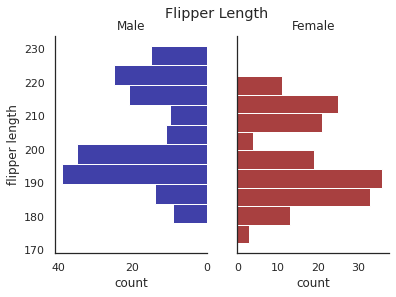

In [124]:
#HISTOGRAM comparison- 
fig, ax = plt.subplots(ncols=2, nrows=1, sharey = True)
sns.histplot(y = "flipper_length_mm", color = "darkblue", ax=ax[0], data = data[(data.sex == "Male")])
sns.histplot(y = "flipper_length_mm", color = "darkred", ax=ax[1], data = data[(data.sex == "Female")])
ax[0].invert_xaxis()
ax[0].set_title("Male")
ax[1].set_title("Female")
ax[0].set(xlabel="count", ylabel="flipper length") 
ax[1].set(xlabel="count", ylabel="")
fig.suptitle("Flipper Length")


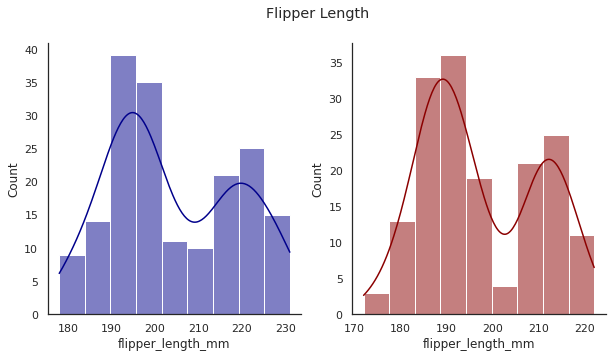

In [125]:
#HISTOGRAM comparison- 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10, 5))
sns.histplot(ax = ax[0], x = "flipper_length_mm", kde = True, color = "darkblue", data = data[(data.sex == "Male")])
sns.histplot(ax = ax[1], x = "flipper_length_mm", kde = True, color = "darkred", data = data[(data.sex == "Female")])
plt.suptitle("Flipper Length")
plt.show()

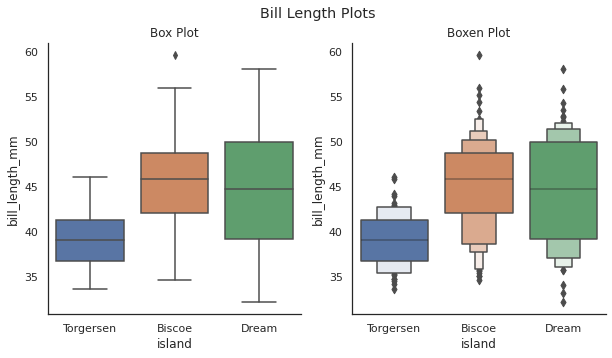

In [126]:
#BOX comparison-
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10, 5))
#BOX
viz_box = sns.boxplot(data = data, x = "island", y = "bill_length_mm", ax = ax[0])
#BOXEN
viz_boxen = sns.boxenplot(data = data, x = "island", y = "bill_length_mm", ax = ax[1])
ax[0].set_title("Box Plot")
ax[1].set_title("Boxen Plot")
plt.suptitle("Bill Length Plots")
plt.show()

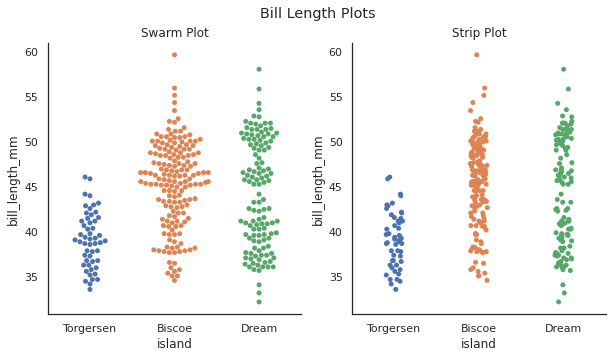

In [127]:
#SWARM - STRIP comparison-
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10, 5))
#SWARM
viz_swarm = sns.swarmplot(data = data, x = "island", y = "bill_length_mm",  ax = ax[0])
#STRIP
viz_strip = sns.stripplot(data = data, x = "island", y = "bill_length_mm",  ax = ax[1])
ax[0].set_title("Swarm Plot")
ax[1].set_title("Strip Plot")
plt.suptitle("Bill Length Plots")
plt.show()

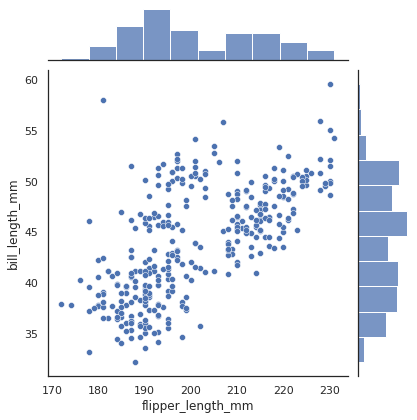

In [128]:
sns.jointplot(data=data, x = "flipper_length_mm", y = "bill_length_mm")

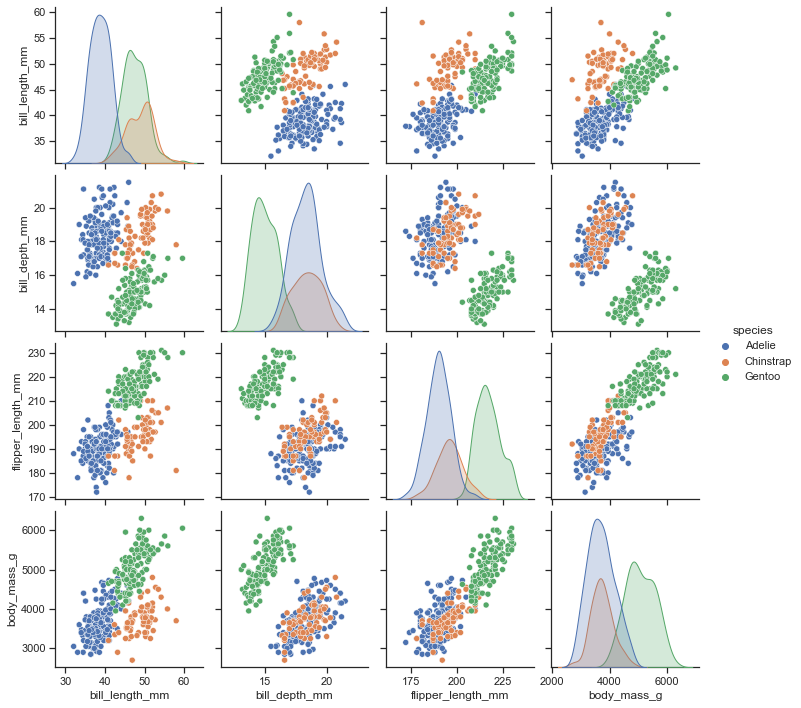

In [129]:
#PAIRPLOT
sns.set_theme(style="ticks")
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='bill_length_mm'>

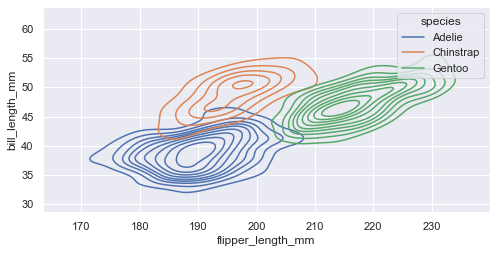

In [130]:
#KDE PLOT
sns.set_theme(style="darkgrid")
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
# Draw a contour plot to represent each bivariate density
sns.kdeplot(data=data, x="flipper_length_mm", y="bill_length_mm", hue="species", thresh=.1)

Plot more complicated graphs

Text(0.5, 0.98, 'Flipper Length Ridgeline Plot')

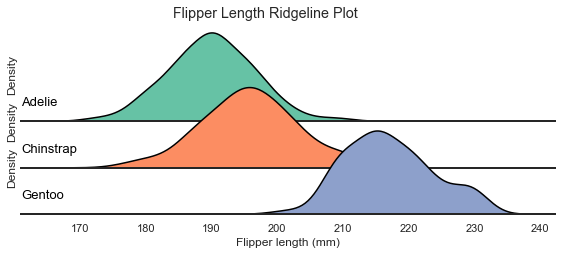

In [131]:
#RIDGELINE
species = ['Adelie', 'Chinstrap', 'Gentoo']
df_filtered = data[data['species'].isin(species)]
df_filtered
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(df_filtered, palette=palette, row="species", hue="species", aspect=7, height=1.2)
g.map_dataframe(sns.kdeplot, x="flipper_length_mm", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="flipper_length_mm", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "species")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Flipper length (mm)")
g.despine( left=True)
plt.suptitle('Flipper Length Ridgeline Plot', y=0.98)

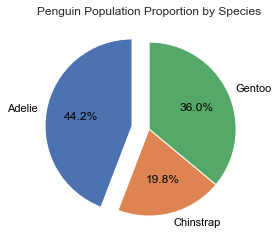

In [132]:
#PIEPLOT
data_group = data.groupby('species').count()
data_group = data_group.reset_index()
values = data_group['island']
labels = data_group['species']
plt.pie(values, labels = labels, radius = 1, startangle = 90, 
    explode = [0.2, 0.0, 0.0], textprops=dict(color="black"), autopct='%1.1f%%')
plt.title("Penguin Population Proportion by Species")
plt.show()

"\nsns.boxplot(x='flipper_length_mm', y='species', data=data, width=0.25, showfliers=False, showmeans=True, \n            meanprops=dict(marker='o', markerfacecolor='darkorange', markersize=10, zorder=3),\n            boxprops=dict(facecolor=(0,0,0,0), linewidth=3, zorder=3), whiskerprops=dict(linewidth=3), \n            capprops=dict(linewidth=3), medianprops=dict(linewidth=3))\nplt.legend(frameon=False, fontsize=15, loc='upper right')\nadd_cosmetics()\n"

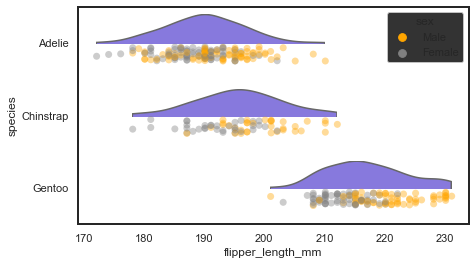

In [133]:
#RAINCLOUD
def add_cosmetics(title='Penguin Flipper Length Raincloud Plot', xlabel='Flipper length', ylabel='Species'):
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    sns.despine()
plt.figure(figsize=(7, 4))
# Create violin plots without mini-boxplots inside.
ax = sns.violinplot(x='flipper_length_mm', y='species', data=data, color='mediumslateblue', cut=0, inner=None)
# Clip the lower half of each violin.
for item in ax.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2, transform=ax.transData))
# Create strip plots with partially transparent points of different colors depending on the group.
num_items = len(ax.collections)
sns.stripplot(x='flipper_length_mm', y='species', hue='sex', data=data, palette=['orange', 'gray'], alpha=0.4, size=7)
# Shift each strip plot strictly below the correponding volin.
for item in ax.collections[num_items:]: item.set_offsets(item.get_offsets() + 0.15)
# Create narrow boxplots on top of the corresponding violin and strip plots, with thick lines, the mean values, without the outliers.
'''
sns.boxplot(x='flipper_length_mm', y='species', data=data, width=0.25, showfliers=False, showmeans=True, 
            meanprops=dict(marker='o', markerfacecolor='darkorange', markersize=10, zorder=3),
            boxprops=dict(facecolor=(0,0,0,0), linewidth=3, zorder=3), whiskerprops=dict(linewidth=3), 
            capprops=dict(linewidth=3), medianprops=dict(linewidth=3))
plt.legend(frameon=False, fontsize=15, loc='upper right')
add_cosmetics()
'''

In [134]:
#SUNBURST
import plotly.express as px
import plotly.graph_objects as go
fig = px.sunburst(data,
                  path=["sex", "island", "species"],
                  values='bill_length_mm',
                  title="Penguin Species by Gender & Island (Plotly Express)",
                  width=450, height=450)
fig.show()

In [135]:
#TREEMAP
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette
data2 = {'labels': ["A","B","C","D","E","F","G"],
        'values':[10,20,25,35,10,25,45]}
df = pd.DataFrame(data2)
fig = px.treemap(df, path=['labels'],values='values', width=400, height=200, title = "Random Treemap: Color = Relative Value")
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=25, l=25, r=25, b=25))
fig.show()

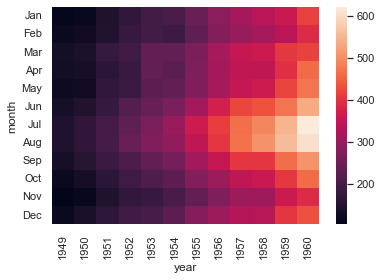

In [136]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
viz = sns.heatmap(flights)

Plot network diagrams

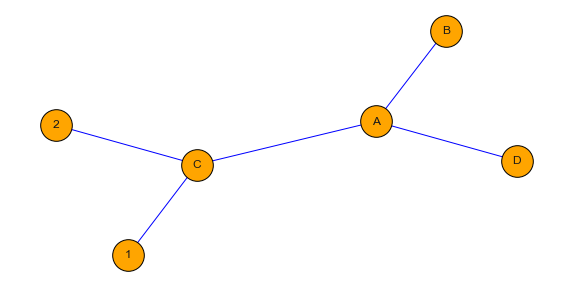

In [137]:
fig, ax = plt.subplots(figsize=(10,5))

relationships = pd.DataFrame({'from': ['A', 'A', 'A', '1', '2'], 
                              'to':   ['B', 'C', 'D', 'C', 'C']})

# Create DF for node characteristics
carac = pd.DataFrame({'ID':['A', 'B', 'C', 'D', '1', '2'], 
                      'type':['Letter','Letter', 'Letter', 'Letter', 
                      'Number', 'Number']})

# Create graph object
G = nx.from_pandas_edgelist(relationships, 'from', 'to', create_using=nx.Graph())

# Make types into categories
carac = carac.set_index('ID')
carac = carac.reindex(G.nodes())

carac['type'] = pd.Categorical(carac['type'])
carac['type'].cat.codes

# Specify colors
#cmap = mpl.colors.ListedColormap(['C0', 'darkorange'])

# Set node sizes
#node_sizes = [4000 if entry != 'Letter' else 1000 for entry in carac.type]
node_sizes = 1000

# Set edge colors
#edge_colors = ['blue', 'red', 'green', 'orange', 'blue']
edge_colors = 'blue'

# Set edge widths
#edge_widths = [0.1, 1, 2, 3, 5]
edge_widths = 1

# Draw graph
#nx.draw(G, with_labels=True, node_color=carac['type'].cat.codes, node_size=node_sizes, width=edge_widths, 
#    edge_color=edge_colors, edgecolors='black', cmap=cmap)
nx.draw(G, with_labels=True, node_color='orange', node_size=node_sizes, width=edge_widths, 
    edge_color=edge_colors, edgecolors='black')


Text(0.5, 1.0, 'Kamada Kawai Layout')

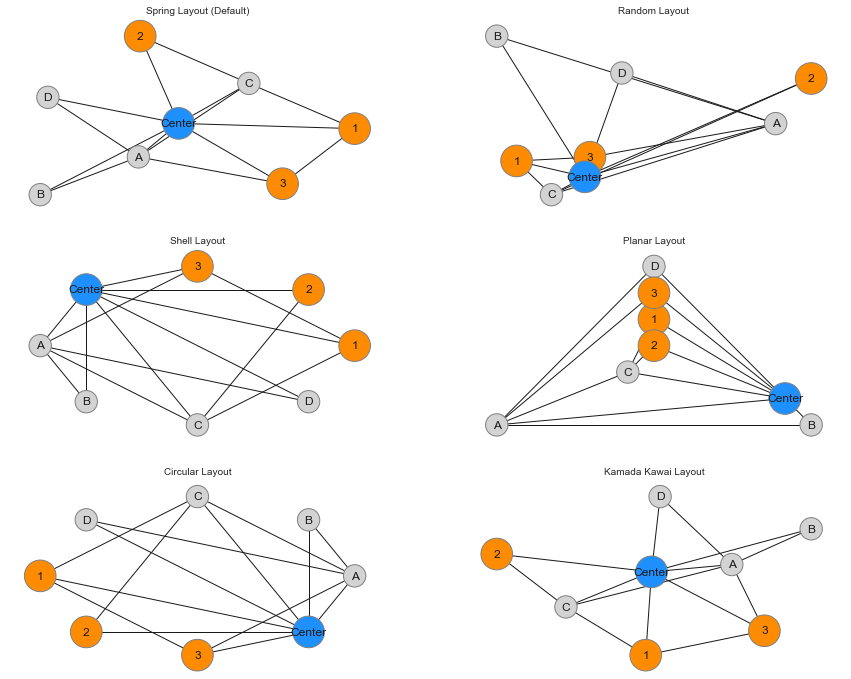

In [138]:
# Set overall figure size
f = plt.figure(figsize=(15,12))
f.tight_layout()

# Specify data and attributes
relationships = pd.DataFrame({'from': ['A', 'A', 'A', '1', '2', '3', '1', 'Center', 'Center', 
                                       'Center', 'Center', 'Center', 'Center', 'Center'], 
                              'to': ['B', 'C', 'D', 'C', 'C', 'A', '3', '1', '3', '2', 'A', 'B', 
                                     'C', 'D']})

# Create DF for node characteristics
carac = pd.DataFrame({'ID':['A', 'B', 'C', 'D', '1', '2', '3', 'Center'], 
                      'type':['Letter','Letter', 'Letter', 'Letter', 'Number', 'Number', 
                              'Number', 'Center']})

# Create graph object
G = nx.from_pandas_edgelist(relationships, 'from', 'to', create_using=nx.Graph())

# Make types into categories
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())

carac['type']=pd.Categorical(carac['type'])
carac['type'].cat.codes

# Set node colors
cmap = mpl.colors.ListedColormap(['dodgerblue', 'lightgray', 'darkorange'])

# Set node sizes
node_sizes = [1000 if entry != 'Letter' else 500 for entry in carac.type]

# Create Layouts

# Subplot 1
plt.subplot(3, 2, 1)
nx.draw(G, with_labels=True, node_color=carac['type'].cat.codes, cmap=cmap, 
        node_size = node_sizes, edgecolors='gray')
plt.title('Spring Layout (Default)', fontsize=10)

# Subplot 2
plt.subplot(3, 2, 2)
nx.draw_random(G, with_labels=True, node_color=carac['type'].cat.codes, cmap=cmap, 
               node_size = node_sizes, edgecolors='gray')
plt.title('Random Layout', fontsize=10)

# Subplot 3
plt.subplot(3, 2, 3)
nx.draw_shell(G, with_labels=True, node_color=carac['type'].cat.codes, cmap=cmap, 
            node_size = node_sizes, edgecolors='gray')
plt.title('Shell Layout', fontsize=10)

# Subplot 4
plt.subplot(3, 2, 4)
nx.draw_planar(G, with_labels=True, node_color=carac['type'].cat.codes, cmap=cmap, 
            node_size = node_sizes, edgecolors='gray')
plt.title('Planar Layout', fontsize=10)

# Subplot 5
plt.subplot(3, 2, 5)
nx.draw_circular(G, with_labels=True, node_color=carac['type'].cat.codes, cmap=cmap, 
            node_size = node_sizes, edgecolors='gray')
plt.title('Circular Layout', fontsize=10)

# Subplot 4
plt.subplot(3, 2, 6)
nx.draw_kamada_kawai(G, with_labels=True, node_color=carac['type'].cat.codes, cmap=cmap, 
            node_size = node_sizes, edgecolors='gray')
plt.title('Kamada Kawai Layout', fontsize=10)


Plot wordclouds

In [139]:
from pathlib import Path
file_loc = Path(r'C:\Users\hruss\OneDrive\Documents\GMU\Repositories\CDS303-F22\data\textDocs')
print(file_loc.is_dir())

True


In [140]:
#Open PDFs so they can be read, 'rb' means read only in binary format
Washington_pdf = open(file_loc/'Address_Washington.pdf', 'rb')
Reagan_pdf = open(file_loc/'Address_Reagan.pdf', 'rb')
JFK_pdf = open(file_loc/'Address_JFK.pdf', 'rb')

In [141]:
#Creating a pdf file object using PyPDF.
#Extract text from pdfs

JFK_read_pdf = pyp.PdfFileReader(JFK_pdf)
Washington_read_pdf = pyp.PdfFileReader(Washington_pdf)
Reagan_read_pdf = pyp.PdfFileReader(Reagan_pdf)
JFK_data = ""
Washington_data = ""
Reagan_data = ""

Jnum_pages = JFK_read_pdf.numPages
for i in range(Jnum_pages) : 
        Jpage = JFK_read_pdf.getPage(i) 
        JFK_data = JFK_data + Jpage.extractText()
Wnum_pages = Washington_read_pdf.numPages
for i in range(Wnum_pages) : 
        Wpage = Washington_read_pdf.getPage(i)
        Washington_data = Washington_data + Wpage.extractText()
Rnum_pages = Reagan_read_pdf.numPages
for i in range(Rnum_pages) : 
        Rpage = Reagan_read_pdf.getPage(i)
        Reagan_data = Reagan_data + Rpage.extractText()

In [142]:
#Perform NLP on data to create more meaningful word clouds
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [Reagan_data, JFK_data, Washington_data]
vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,2))
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
dense = X.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
data = df.transpose()
#Make sure you have these in the same order as your corpus above
data.columns = ['Reagan', 'JFK', 'Washington']

In [143]:
data.head()

,Reagan,JFK,Washington
10,0.040491,0.0,0.000000
10 percent,0.040491,0.0,0.000000
1789,0.000000,0.0,0.026668
1789 fellow,0.000000,0.0,0.026668
1917,0.013497,0.0,0.000000


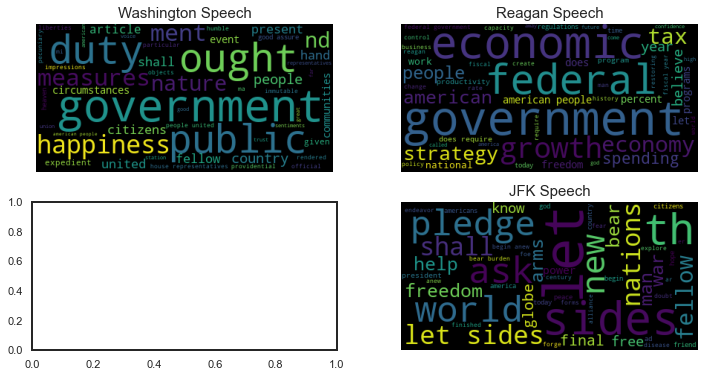

In [146]:
#Show wordclouds
colors = "viridis"
maxwords = 50

# Set overall figure size
f = plt.figure(figsize=(12,6))
f.tight_layout()

# Subplot 1
plt.subplot(2, 2, 1)
Washington_wordcloud = WordCloud(max_words = maxwords, colormap = colors).generate_from_frequencies(data['Washington'])
plt.imshow(Washington_wordcloud)
plt.axis('off')
plt.title('Washington Speech', fontsize=15)
# Subplot 2
plt.subplot(2, 2, 2)
Reagan_wordcloud = WordCloud(max_words = maxwords, colormap = colors).generate_from_frequencies(data['Reagan'])
plt.imshow(Reagan_wordcloud)
plt.axis('off')
plt.title('Reagan Speech', fontsize=15)
# Subplot 3
plt.subplot(2, 2, 3)
# Subplot 4
plt.subplot(2, 2, 4)
JFK_wordcloud = WordCloud(max_words = maxwords, colormap = colors).generate_from_frequencies(data['JFK'])
plt.imshow(JFK_wordcloud)
plt.axis('off')
plt.title('JFK Speech', fontsize=15);


Import, view and encode images

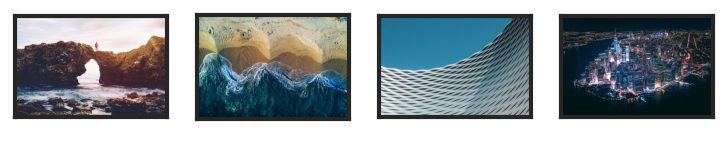

In [148]:
#importing and viewing all images from folder
img_filenames = sorted(os.listdir(r'C:\Users\hruss\OneDrive\Documents\GMU\Repositories\CSI703-F22\images')) 
imgs = [mpimg.imread(os.path.join(r'C:\Users\hruss\OneDrive\Documents\GMU\Repositories\CSI703-F22\images', img_filename)) for img_filename in img_filenames]
fig, axes = plt.subplots(1, 4) 
fig.figsize = (6, 6) 
fig.dpi = 150 
axes = axes.ravel() 
# Specify labels 
labels = ['coast', 'beach', 'building', 'city at night'] 
# Plot images 
for i in range(len(imgs)): 
    axes[i].imshow(imgs[i]) 
    axes[i].set_xticks([]) 
    axes[i].set_yticks([]) 
    axes[i].set_xlabel(labels[i], color='white')

In [150]:
#Converting image to array for analysis purposes
img = PIL.Image.open(r'C:\Users\hruss\OneDrive\Documents\GMU\Repositories\CSI703-F22\images\photo-1.jpg').convert("L")
imgarr = np.array(img)
imgarr

array([[218, 219, 219, ..., 229, 228, 228],
       [219, 219, 219, ..., 229, 228, 228],
       [220, 220, 220, ..., 228, 228, 227],
       ...,
       [ 39,  39,  39, ...,  40,  40,  40],
       [ 39,  39,  39, ...,  40,  40,  40],
       [ 39,  39,  39, ...,  40,  40,  40]], dtype=uint8)


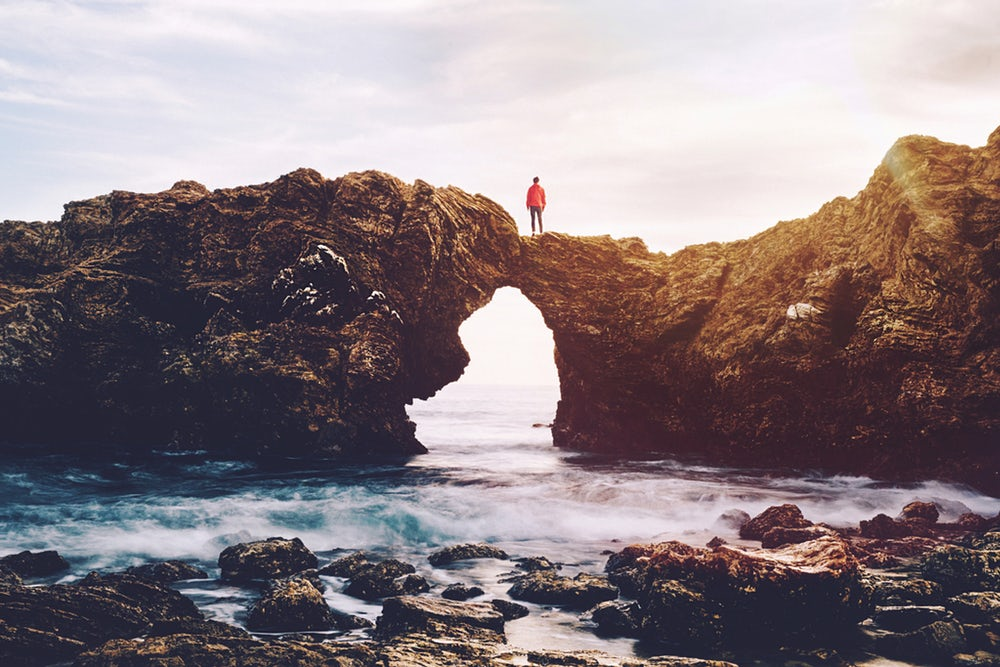

In [151]:
#Converting image to base64 so image file no longer needs to exist
#If sending your code to someone who can't (or doesn't want to) accept images
#Here, we covert to base64, then visualize it from that code (not from the file)
image = PILImage.open(r"C:\Users\hruss\OneDrive\Documents\GMU\Repositories\CSI703-F22\images\photo-1.jpg")
output = io.BytesIO()
image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()
html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

Plot data on a map

In [ ]:
#List of Mapbox examples: https://docs.mapbox.com/mapbox-gl-js/example/

In [154]:
#Import world GDP dataset
G_GDP = pd.read_csv(r'C:\Users\hruss\OneDrive\Documents\GMU\Repositories\CSI703-F22\GlobalGDP.csv')
G_GDP.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [155]:
#First, determine what data you need, and how you would like to project it on the map
#Type = scattergeo, linegeo or choropleth
#Example for using color scale for values, note that I reversed the scale so that darker = larger values
data = dict(type='choropleth', locations = G_GDP['CODE'], z = G_GDP['GDP (BILLIONS)'], text = G_GDP['COUNTRY'], reversescale = True, autocolorscale = True, colorbar_title = "GDP")

#Next, we want to determine the projection type. Remember our list includes #Projections =  'equirectangular', 'mercator', 'orthographic', 'natural earth', 'kavrayskiy7', 
# 'miller', 'robinson', 'eckert4', 'azimuthal equal area', 'azimuthal equidistant', 'conic equal area', 'conic conformal', 'conic equidistant', 'gnomonic', 'stereographic', 'mollweide', 'hammer', 'transverse mercator', 
# 'albers usa', 'winkel tripel', 'aitoff' and 'sinusoidal'.
proj_type = 'robinson'

#Here, we put our specifications for data and projection together
#Scope = 'world', 'usa', 'europe', 'asia', 'africa', 'north america', 'south america'.
# landcolor="LightGreen", showocean=True, oceancolor="LightBlue", showlakes=True, lakecolor="Blue", 
# showrivers=True, rivercolor="Blue", showcountries=True, countrycolor="RebeccaPurple"
layout = dict(title = proj_type, geo = dict( projection = {'type': proj_type}, scope = 'world', showlakes = True, 
    lakecolor = 'rgb(0,191,255)', lataxis_showgrid=True, lonaxis_showgrid=True,
    resolution=50, showcoastlines=True, coastlinecolor="RebeccaPurple", showland=True))

#Finally, we plot our figure
x = pg.Figure(data = [data], layout = layout)
po.iplot(x)


In [156]:
#Example for using scaled symbols instead of colors
#Note, I used 'hourglass-open'. You have a huge list of marker types listed here: https://plotly.com/python/marker-style/
scale = G_GDP['GDP (BILLIONS)'] / 20
data = dict(type='scattergeo', locations = G_GDP['CODE'], marker_size = G_GDP['GDP (BILLIONS)']/scale, marker_symbol = 'hourglass', text = G_GDP['COUNTRY'])

#Next, we want to determine the projection type. Remember our list includes #Projections =  'equirectangular', 'mercator', 'orthographic', 'natural earth', 'kavrayskiy7', 
# 'miller', 'robinson', 'eckert4', 'azimuthal equal area', 'azimuthal equidistant', 'conic equal area', 'conic conformal', 'conic equidistant', 'gnomonic', 'stereographic', 'mollweide', 'hammer', 'transverse mercator', 
# 'albers usa', 'winkel tripel', 'aitoff' and 'sinusoidal'.
proj_type = 'robinson'

#Here, we put our specifications for data and projection together
#Scope = 'world', 'usa', 'europe', 'asia', 'africa', 'north america', 'south america'.
# landcolor="LightGreen", showocean=True, oceancolor="LightBlue", showlakes=True, lakecolor="Blue", 
# showrivers=True, rivercolor="Blue", showcountries=True, countrycolor="RebeccaPurple"
layout = dict(title = proj_type, geo = dict( projection = {'type': proj_type}, scope = 'world', showlakes = True, 
    lakecolor = 'rgb(0,191,255)', lataxis_showgrid=True, lonaxis_showgrid=True,
    resolution=50, showcoastlines=True, coastlinecolor="RebeccaPurple", showland=True))

#Finally, we plot our figure
x = pg.Figure(data = [data], layout = layout)
po.iplot(x)

Create colormaps to discover different color combos 

In [157]:
#CREATING COLORMAPS

cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

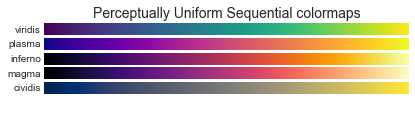

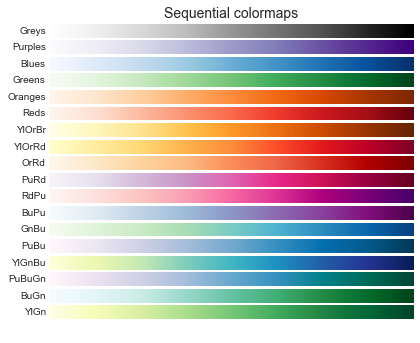

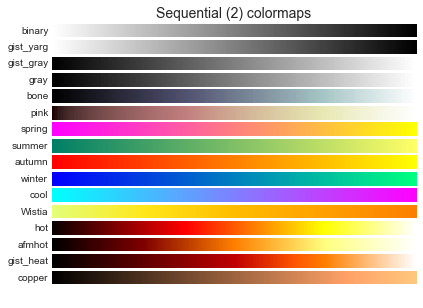

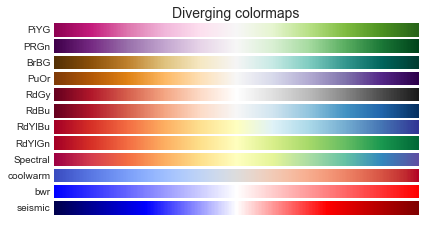

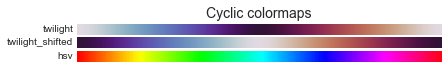

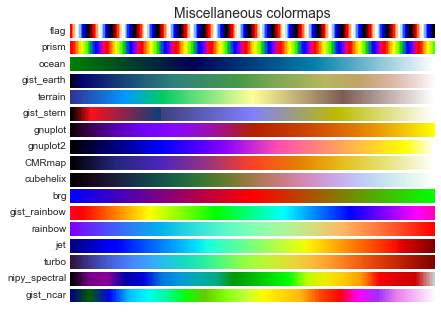

In [158]:
plot_color_gradients('Perceptually Uniform Sequential',
                     ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])
plot_color_gradients('Sequential',
                     ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])
plot_color_gradients('Sequential (2)',
                     ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])
plot_color_gradients('Diverging',
                     ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
                      'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'])
plot_color_gradients('Cyclic', ['twilight', 'twilight_shifted', 'hsv'])
plot_color_gradients('Miscellaneous',
                     ['flag', 'prism', 'ocean', 'gist_earth', 'terrain',
                      'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
                      'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet',
                      'turbo', 'nipy_spectral', 'gist_ncar'])